# Plotting everything for research purposes in the development of the Python version of `vwf`

This notebook exists for research purposes to plot the various comparisons:
- Using either MERRA2 or ERA5.
- How the reanalysis data is processed into wind speed via Method 1 or Method 2.
- How spatial (no. of clusters) and temporal (from yearly to monthly) 
- How it compares to the original R code version
- How it compares to another similar software Atlite.

## Comparing Renewables.Ninja variations and Atlite

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import glob
from pathlib import Path

from vwf.extras import (
    run_all_metrics
)

sns.set_theme()
sns.set_style("white")

### Mean Absolute Error

In [2]:
# needs to run once
# run_all_metrics()

# Use to join multiple file
path = Path('data/results/metrics/') # use your path
all_files = Path(path).glob('*.csv')

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_metrics = pd.concat(li, axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

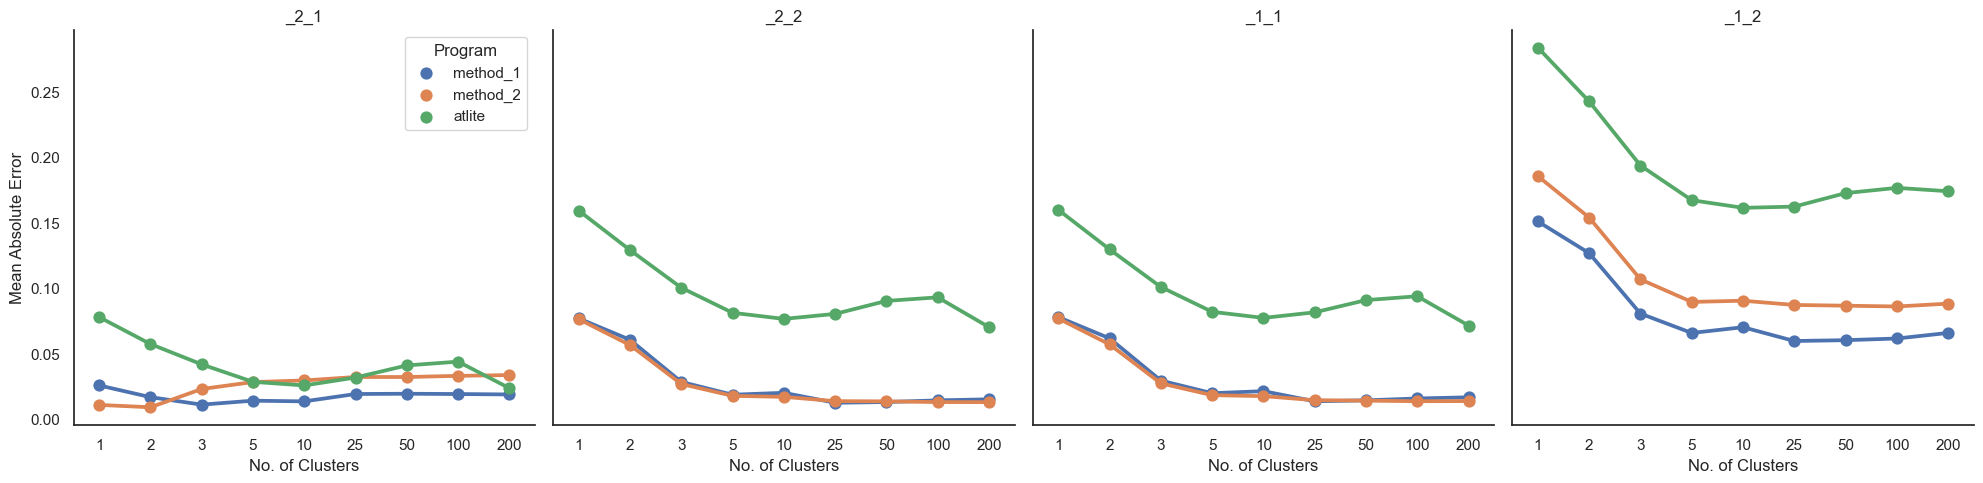

In [34]:
equation_combo = ['_1_1', '_1_2', '_2_1', '_2_2']

# for equation in equation_combo:

g = sns.catplot(
    x="num_clu",
    y="abs_err",
    col = 'equation',
    hue = 'method', 
    data = all_metrics[(all_metrics['mode'] == 'era5') & (all_metrics['time_res'] == 'two_month')], 
    kind = 'point',
    errorbar = None,
    legend_out = False
)

g.set_axis_labels("No. of Clusters", "Mean Absolute Error")
g.set_titles("{col_name}")
g._legend.set_title('Program')

### Uncorrected Comparisons

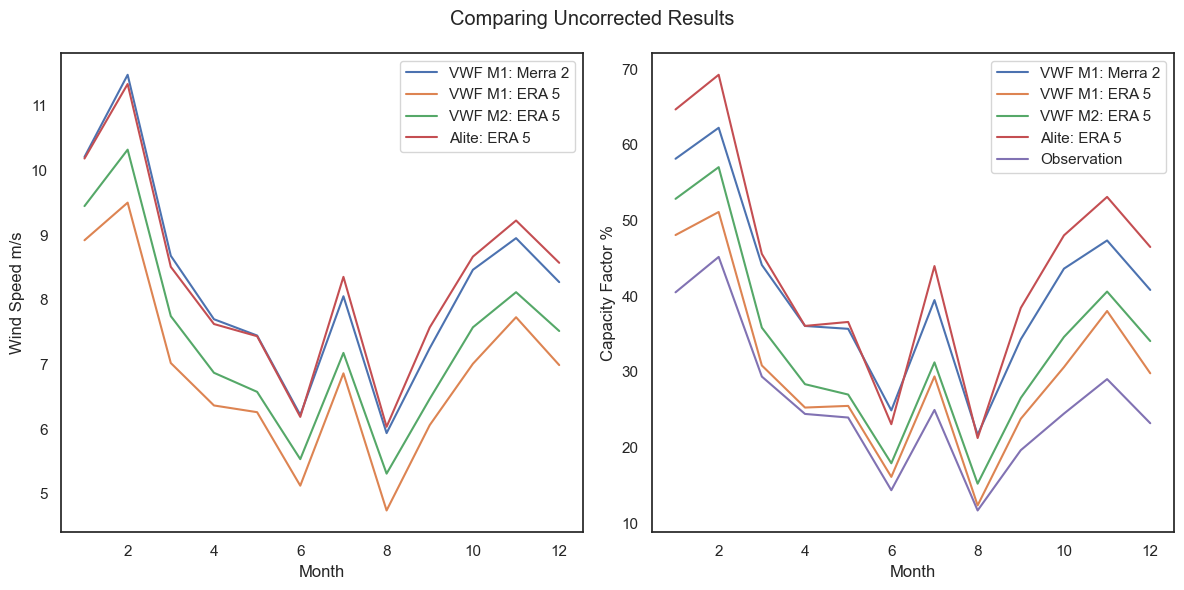

In [5]:
cf_merra2_unc = pd.read_csv('data/results/merra2_method_1_2020_cf_uncorr.csv', parse_dates=['time'])
cf_merra2_unc_month = cf_merra2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
cf_vwf1_unc = pd.read_csv('../../../../results/raw_2_2/era5_method_1_2020_cf_uncorr.csv', parse_dates=['time'])
cf_vwf1_unc_month = cf_vwf1_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
cf_vwf2_unc = pd.read_csv('../../../../results/raw_2_2/era5_method_2_2020_cf_uncorr.csv', parse_dates=['time'])
cf_vwf2_unc_month = cf_vwf2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

cf_atlite_unc = pd.read_csv('../../../../results/atlite_2_2/atlite_2020_cf_uncorr.csv', parse_dates=['time'])
cf_atlite_unc_month = cf_atlite_unc.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

ws_merra2_unc = pd.read_csv('data/results/merra2_method_1_2020_speed_uncorr.csv', parse_dates=['time'])
ws_merra2_unc_month = ws_merra2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
ws_vwf1_unc = pd.read_csv('../../../../results/raw_2_2/era5_method_1_2020_speed_uncorr.csv', parse_dates=['time'])
ws_vwf1_unc_month = ws_vwf1_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
ws_vwf2_unc = pd.read_csv('../../../../results/raw_2_2/era5_method_2_2020_speed_uncorr.csv', parse_dates=['time'])
ws_vwf2_unc_month = ws_vwf2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

ws_atlite_unc = pd.read_csv('../../../../results/atlite_2_2/atlite_2020_speed_uncorr.csv', parse_dates=['time'])
ws_atlite_unc_month = ws_atlite_unc.groupby(pd.Grouper(key='time',freq='M'))['speed'].mean().values


# setting up plot
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(gs[:, 0])
ax1.set_ylabel('Wind Speed m/s')
ax1.set_xlabel('Month')
ax1.plot(range(1,13), ws_merra2_unc_month, label='VWF M1: Merra 2')
ax1.plot(range(1,13), ws_vwf1_unc_month, label='VWF M1: ERA 5')
ax1.plot(range(1,13), ws_vwf2_unc_month, label='VWF M2: ERA 5')
ax1.plot(range(1,13), ws_atlite_unc_month, label='Alite: ERA 5')
ax1.legend()

ax2 = fig.add_subplot(gs[:, 1])
ax2.set_ylabel('Capacity Factor %')
ax2.set_xlabel('Month')
ax2.plot(range(1,13), cf_merra2_unc_month*100, label='VWF M1: Merra 2')
ax2.plot(range(1,13), cf_vwf1_unc_month*100, label='VWF M1: ERA 5')
ax2.plot(range(1,13), cf_vwf2_unc_month*100, label='VWF M2: ERA 5')
ax2.plot(range(1,13), cf_atlite_unc_month*100, label='Alite: ERA 5')
ax2.plot(range(1,13), cf_obs_month*100, label='Observation')
ax2.legend()

fig.suptitle('Comparing Uncorrected Results')

gs.tight_layout(fig)
plt.show()

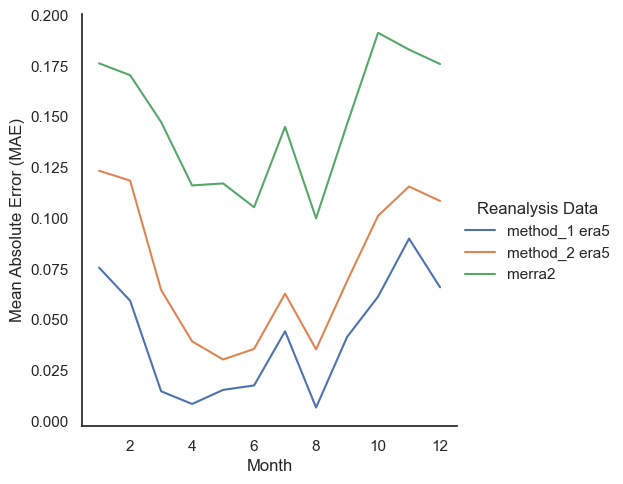

In [68]:
unc_comp = all_metrics[(all_metrics['method'] != 'atlite') & (all_metrics['time_res'] == 'uncorr')]
unc_comp.loc[unc_comp['mode'] == 'merra2', 'method'] = 'merra2'
unc_comp.loc[unc_comp['mode'] == 'era5', 'method'] += ' era5'

g = sns.relplot(
    x="month",
    y="abs_err",
    hue = 'method', 
    data = unc_comp, 
    kind = 'line',
)

g.set_axis_labels("Month", "Mean Absolute Error (MAE)")
g.set_titles("{col_name}")
g._legend.set_title('Reanalysis Data')

### Corrected Comparison

In [76]:
method_comp = all_metrics[(all_metrics['mode'] == 'era5') & (all_metrics['method'] != 'atlite') & (all_metrics['equation'] == '_2_2')]

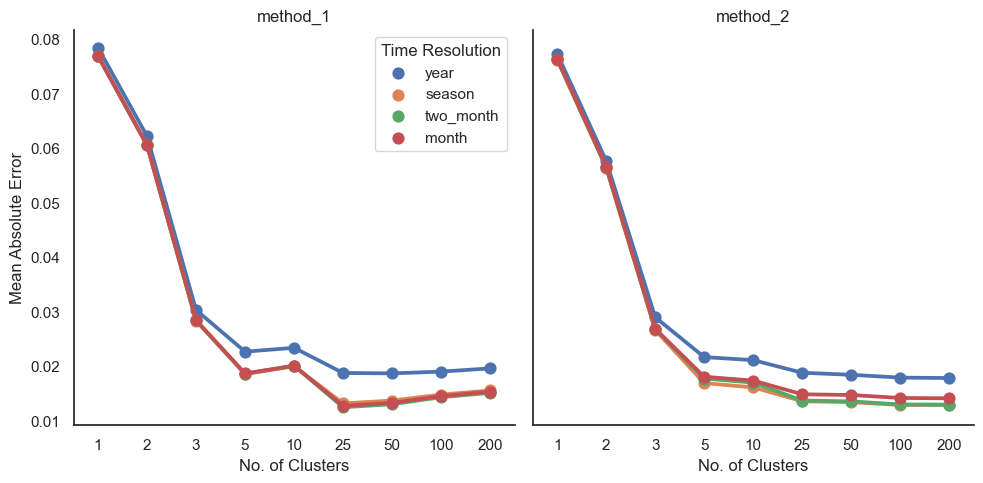

In [77]:
g = sns.catplot(
    x="num_clu",
    y="abs_err",
    col = 'method',
    hue = 'time_res', 
    data = method_comp, 
    kind = 'point',
    errorbar = None,
    legend_out = False
)

g.set_axis_labels("No. of Clusters", "Mean Absolute Error")
g.set_titles("{col_name}")
g._legend.set_title('Time Resolution')

In [88]:
all_metrics[(all_metrics['mode'] == 'era5') & (all_metrics['method'] == 'method_2') & (all_metrics['equation'] == '_2_2') & (all_metrics['num_clu'] == 200)].groupby('time_res')['abs_err'].mean()

time_res
month        0.014030
season       0.012791
two_month    0.012866
year         0.017745
Name: abs_err, dtype: float64

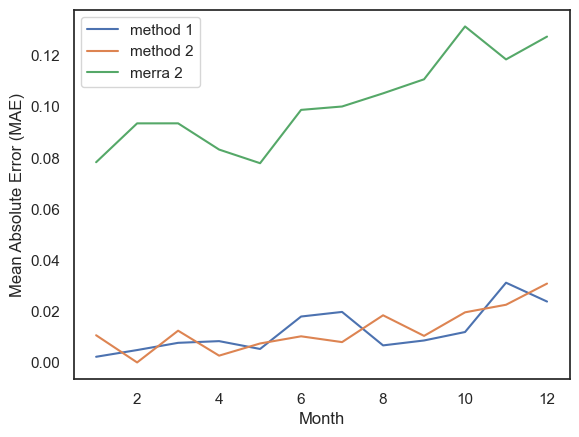

In [93]:
best_m1 = all_metrics[(all_metrics['mode'] == 'era5') & (all_metrics['method'] == 'method_1') & (all_metrics['equation'] == '_2_2') & (all_metrics['num_clu'] == 25) & (all_metrics['time_res'] == 'two_month')]['abs_err']
best_m2 = all_metrics[(all_metrics['mode'] == 'era5') & (all_metrics['method'] == 'method_2') & (all_metrics['equation'] == '_2_2') & (all_metrics['num_clu'] == 200) & (all_metrics['time_res'] == 'season')]['abs_err']

plt.plot(range(1,13), best_m1, label='method 1')
plt.plot(range(1,13), best_m2, label='method 2')
# plt.plot(range(1,13), frame[(frame['num_clu'] == 10) & (frame['time_res'] == 'two_month') & (frame['method'] == 'atlite')]['abs_err'], label='atlite')
plt.plot(range(1,13), all_metrics[(all_metrics['time_res'] != 'uncorr') & (all_metrics['mode'] == 'merra2')]['abs_err'], label='merra 2')

plt.xlabel('Month')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend();

## Comparing Original Renewables.Ninja to Python Version

In [9]:
# # reading in wind speed and making it monthly
# ws_r_uncorr = pd.read_csv('../../R/VWF/Simulations/denmark_farms_speed_uncorr_all.csv', parse_dates=['Timestamp']) # hourly speed
# ws_r_corr = pd.read_csv('../../R/VWF/Simulations/denmark_farms_speed_corr_all.csv', parse_dates=['timeVector']) # hourly speed
# ws_merra2_uncorr = pd.read_csv('data/results/raw/merra2_method_1_'+str(test_year)+'_speed_uncorr.csv', parse_dates=['time']) # daily speed
# ws_merra2_corr = pd.read_csv('data/results/raw/merra2_method_1_'+str(test_year)+'_year_1_clusters_speed_corr.csv', parse_dates=['time']) # daily speed

# ws_r_uncorr_month = ws_r_uncorr.groupby(pd.Grouper(key='Timestamp',freq='M')).mean().transpose().mean().values
# ws_r_corr_month = ws_r_corr.groupby(pd.Grouper(key='timeVector',freq='M')).mean().transpose().mean().values
# ws_merra2_uncorr_month = ws_merra2_uncorr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
# ws_merra2_corr_month = ws_merra2_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values


# # reading in capacity factors and making it monthly
# cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
# cf_r_uncorr = pd.read_csv('../../R/VWF/Simulations/denmark_farms_CF_uncorr_monthly.csv', parse_dates=['date']) # monthly cf
# cf_r_corr = pd.read_csv('../../R/VWF/Simulations/denmark_farms_CF_corr_monthly.csv', parse_dates=['date']) # monthly cf
# cf_merra2_uncorr = pd.read_csv('data/results/raw/merra2_method_1_'+str(test_year)+'_cf_uncorr.csv', parse_dates=['time']) # daily cf
# cf_merra2_corr = pd.read_csv('data/results/raw/merra2_method_1_'+str(test_year)+'_year_1_clusters_cf_corr.csv', parse_dates=['time']) # daily cf

# cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
# cf_r_uncorr_month = cf_r_uncorr.groupby(pd.Grouper(key='date',freq='M')).mean().transpose().mean().values
# cf_r_corr_month = cf_r_corr.groupby(pd.Grouper(key='date',freq='M')).mean().transpose().mean().values
# cf_merra2_uncorr_month = cf_merra2_uncorr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
# cf_merra2_corr_month = cf_merra2_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

In [10]:
# # setting up plot
# gs = gridspec.GridSpec(2, 2)

# fig = plt.figure(figsize=(12,10))
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_ylabel('Wind Speed m/s')
# ax1.set_xlabel('Month')
# ax1.plot(range(1,13), ws_merra2_uncorr_month, label='Python')
# ax1.plot(range(1,13), ws_r_uncorr_month, label='R')
# ax1.legend()

# ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
# ax2.set_xlabel('Month')
# ax2.plot(range(1,13), ws_merra2_corr_month, label='Python')
# ax2.plot(range(1,13), ws_r_corr_month, label='R')
# ax2.legend()

# ax3 = fig.add_subplot(gs[1, 0])
# ax3.set_ylabel('Capacity Factor %')
# ax3.set_xlabel('Month')
# ax3.plot(range(1,13), cf_merra2_uncorr_month*100, label='Python')
# ax3.plot(range(1,13), cf_r_uncorr_month*100, label='R')
# ax3.plot(range(1,13), cf_obs_month*100, label='Observation')
# ax3.legend()

# ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)
# ax4.set_xlabel('Month')
# ax4.plot(range(1,13), cf_merra2_corr_month*100, label='Python')
# ax4.plot(range(1,13), cf_r_corr_month*100, label='R')
# ax4.plot(range(1,13), cf_obs_month*100, label='Observation')
# ax4.legend()

# fig.suptitle('Renewables.Ninja Merra 2: R vs Python')

# gs.tight_layout(fig)
# plt.show()

## Other Plotting Functions

In [11]:
# def plot_cf(mode, method, test_year, cluster_list):
#     cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
#     cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
#     cf_uncorr = pd.read_csv('data/results/raw/'+mode+'_'+method+'_'+str(test_year)+'_cf_uncorr.csv', parse_dates=['time'])
#     cf_month_uncorr = cf_uncorr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

#     # setting up plot
#     gs = gridspec.GridSpec(2, 1)
#     fig = plt.figure(figsize=(9, 7))
    
#     ax2 = fig.add_subplot(gs[:, :])
#     ax2.set_ylabel('Capacity Factor %')
#     ax2.set_xlabel('Month')
#     ax2.plot(range(1,13), cf_obs_month*100, label='Observation')
#     ax2.plot(range(1,13), cf_month_uncorr*100, label='Uncorrected')

#     for num_clu in cluster_list:
#         cf_corr = pd.read_csv('data/results/raw/'+mode+'_'+method+'_'+str(test_year)+'_'+time_res+'_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
#         cf_month = cf_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
        
#         ax2.plot(range(1,13), cf_month*100, label=str(num_clu)+' Clusters')

#     ax2.legend()
#     fig.suptitle(mode+' '+method+' for '+str(test_year)+' corrected by '+time_res)
#     gs.tight_layout(fig)
#     plt.show()


# plot_cf(mode, 'method_1', test_year, cluster_list)

In [27]:
def plot_results(mode, method, year, num_clu, time_res):
    
    # loading results
    cf = pd.read_csv('data/results/raw/'+mode+'_'+method+'_'+str(year)+'_cf_uncorr.csv', parse_dates=['time'])
    cf_corr = pd.read_csv('data/results/raw/'+mode+'_'+method+'_'+str(year)+'_'+time_res+'_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
    
    # loading external results
    cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
    cf_atlite = pd.read_csv('data/results/atlite/atlite_'+str(year)+'_cf_uncorr.csv', parse_dates=['time'])
    cf_atlite_corr = pd.read_csv('data/results/atlite/atlite_'+str(year)+'_'+time_res+'_'+str(10)+'_clusters_cf_corr.csv', parse_dates=['time'])
    cf_merra2_unc = pd.read_csv('data/results/raw/merra2_method_1_2020_cf_uncorr.csv', parse_dates=['time'])
    cf_merra2_corr = pd.read_csv('data/results/raw/merra2_method_1_2020_year_1_clusters_cf_corr.csv', parse_dates=['time'])

    # creating monthly averages
    cf_month = cf.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    cf_corr_month = cf_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    
    cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    cf_atlite_month = cf_atlite.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
    cf_atlite_corr_month = cf_atlite_corr.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
    cf_merra2_unc_month = cf_merra2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    cf_merra2_corr_month = cf_merra2_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values   
    
    
    # setting up plot
    gs = gridspec.GridSpec(1, 1)
    fig = plt.figure(figsize=(9, 7))
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_ylabel('Capacity Factor %')
    ax1.set_xlabel('Month')
    ax1.plot(range(1,13), cf_obs_month*100, label='Observation')
    # ax1.plot(range(1,13), cf_month*100, label='Era 5 Unc')
    ax1.plot(range(1,13), cf_corr_month*100, label='Era 5 Corr - '+str(num_clu))
    ax1.plot(range(1,13), cf_atlite_month*100, label='Atlite Unc')
    ax1.plot(range(1,13), cf_atlite_corr_month*100, label='Atlite Corr - 10')
    # ax1.plot(range(1,13), cf_merra2_unc_month*100, label='Merra 2 Unc')
    ax1.plot(range(1,13), cf_merra2_corr_month*100, label='Merra 2 Corr - 1')
    ax1.legend()

    fig.suptitle(mode+' '+method+' for '+str(year)+' corrected by '+time_res)

    gs.tight_layout(fig)
    plt.show()

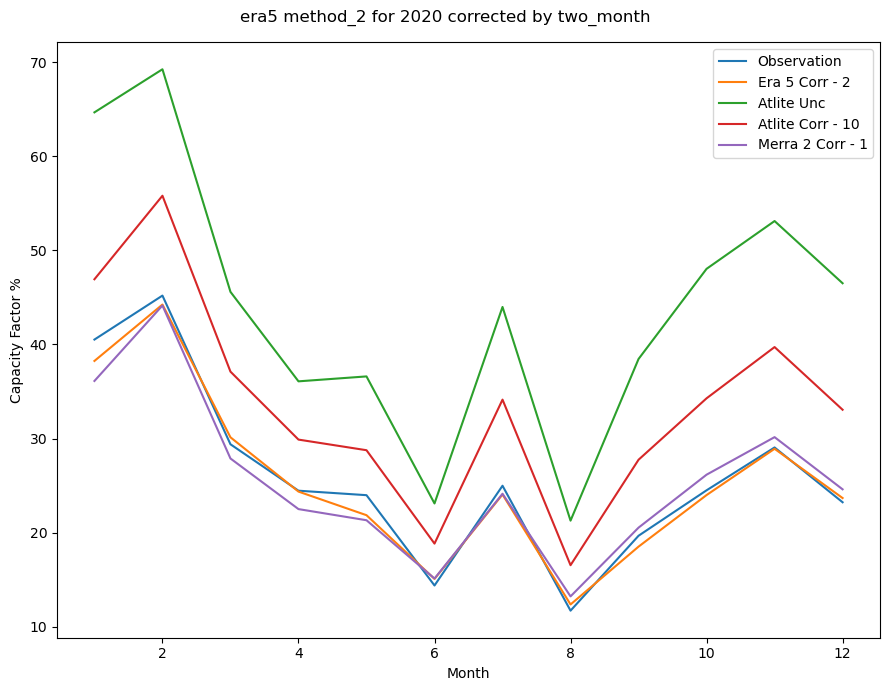

In [28]:
plot_results('era5', 'method_2', 2020, 2, 'two_month')

In [14]:
# def plot_results(mode, method, year, num_clu, time_res):
    
#     # loading results
#     ws = pd.read_csv('data/results/'+mode+'_'+method+'_'+str(year)+'_speed_uncorr.csv', parse_dates=['time'])
#     cf = pd.read_csv('data/results/'+mode+'_'+method+'_'+str(year)+'_cf_uncorr.csv', parse_dates=['time'])
#     ws_corr = pd.read_csv('data/results/'+mode+'_'+method+'_'+str(year)+'_'+time_res+'_'+str(num_clu)+'_clusters_speed_corr.csv', parse_dates=['time'])
#     cf_corr = pd.read_csv('data/results/'+mode+'_'+method+'_'+str(year)+'_'+time_res+'_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
    
#     # loading external results
#     cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
#     ws_atlite = pd.read_csv('data/results/atlite_'+str(year)+'_speed_uncorr.csv', parse_dates=['time'])
#     cf_atlite = pd.read_csv('data/results/atlite_'+str(year)+'_cf_uncorr.csv', parse_dates=['time'])
#     ws_atlite_corr = pd.read_csv('data/results/atlite_'+str(year)+'_month_'+str(num_clu)+'_clusters_speed_corr.csv', parse_dates=['time'])
#     cf_atlite_corr = pd.read_csv('data/results/atlite_'+str(year)+'_month_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
    
#     # creating monthly averages
#     ws_month = ws.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
#     cf_month = cf.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
#     ws_corr_month = ws_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
#     cf_corr_month = cf_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    
#     cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
#     ws_atlite_month = ws_atlite.groupby(pd.Grouper(key='time',freq='M'))['speed'].mean().values
#     cf_atlite_month = cf_atlite.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
#     ws_atlite_corr_month = ws_atlite_corr.groupby(pd.Grouper(key='time',freq='M'))['speed'].mean().values
#     cf_atlite_corr_month = cf_atlite_corr.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
    
#     # setting up plot
#     gs = gridspec.GridSpec(2, 1)

#     fig = plt.figure(figsize=(9, 7))
#     ax1 = fig.add_subplot(gs[0, :])
#     ax1.set_ylabel('Wind Speed m/s')
#     ax1.set_xlabel('Month')
#     ax1.plot(range(1,13), ws_month, label='RN')
#     ax1.plot(range(1,13), ws_corr_month, label='RN Corr')
#     ax1.plot(range(1,13), ws_atlite_month, label='Atlite')
#     ax1.plot(range(1,13), ws_atlite_corr_month, label='Atlite Corr')
#     ax1.legend()

#     ax2 = fig.add_subplot(gs[1, :])
#     ax2.set_ylabel('Capacity Factor %')
#     ax2.set_xlabel('Month')
#     ax2.plot(range(1,13), cf_obs_month*100, label='Observation')
#     ax2.plot(range(1,13), cf_month*100, label='RN')
#     ax2.plot(range(1,13), cf_corr_month*100, label='RN Corr')
#     ax2.plot(range(1,13), cf_atlite_month*100, label='Atlite')
#     ax2.plot(range(1,13), cf_atlite_corr_month*100, label='Atlite Corr')
#     ax2.legend()

#     fig.suptitle(mode+' '+method+' using '+str(num_clu)+' clusters for '+str(year)+' corrected by '+time_res)

#     gs.tight_layout(fig)
#     plt.show()

In [ ]:
mode = 'era5' # 'era5' or 'merra2'
method_list = ['method_1', 'method_2']
test_year = 2020
time_res_list = ['year', 'season', 'two_month', 'month'] 
cluster_list = [1,2,3,5,10,25,50,100,200]

In [6]:
def run_all_metrics():
    
    method_list = ['method_1', 'method_2']
    test_year = 2020
    time_res_list = ['year', 'season', 'two_month', 'month'] 
    cluster_list = [1,2,3,5,10,25,50,100,200]
    equation_combo = ['_1_1', '_1_2', '_2_1', '_2_2']
    
    # importing observation for denmark 2020.
    cf_obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])
    cf_obs_month = cf_obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
                 
    for equation in equation_combo:             
        era5 = calc_metrics_era5(cf_obs_month, test_year, cluster_list, time_res_list, equation)
        atlite = calc_metrics_atlite(cf_obs_month, test_year, cluster_list, time_res_list, equation)
                      
        all_metrics = pd.concat([era5,atlite]).reset_index(drop=True)
        all_metrics.to_csv('data/results/metrics/metrics'+equation+'.csv', index = None)
                      

    merra2 = calc_metrics_merra2(cf_obs_month)
    merra2['equation'] = '_1_1'
    merra2.to_csv('data/results/metrics/metrics_merra2.csv', index = None)
                      
        
def calc_metrics_era5(cf_obs_month, test_year, cluster_list, time_res_list, equation):
    
    method_list = ['method_1', 'method_2']
    abs_err_unc = []
    abs_diff_calc = []
    method_all = []
    cluster_all = []
    time_all = []
    month_all = []
    for method in method_list:
    
        cf_uncorr = pd.read_csv('../../../../results/raw'+equation+'/era5_'+method+'_'+str(test_year)+'_cf_uncorr.csv', parse_dates=['time'])
        cf_month_uncorr = cf_uncorr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
        abs_err = abs(cf_obs_month - cf_month_uncorr)
        abs_err_unc.append(abs_err)
        
        for num_clu in cluster_list:
            
            for time_res in time_res_list:
                
                cf_corr = pd.read_csv('../../../../results/raw'+equation+'/era5_'+method+'_'+str(test_year)+'_'+time_res+'_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
                cf_month = cf_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
                abs_diff = abs(cf_obs_month - cf_month)
                abs_diff_calc.append(abs_diff)
                
                method_all.append([method]*12)
                cluster_all.append([num_clu]*12)
                time_all.append([time_res]*12)
                month_all.append(np.array(range(1,13)))
                

    df_unc = pd.DataFrame(list(zip(np.ravel(method_all[::(len(cluster_list)*len(time_res))]), np.ravel(month_all), np.ravel(abs_err_unc))), 
             columns =['method', 'month', 'abs_err'])

    df_unc['mode'] = 'era5'
    df_unc['num_clu'] = 1
    df_unc['time_res'] = 'uncorr'
    df_unc['equation'] = 'uncorr'
    
    df_corr = pd.DataFrame(list(zip(np.ravel(method_all), np.ravel(cluster_all), np.ravel(time_all), np.ravel(month_all), np.ravel(abs_diff_calc))), 
                 columns =['method','num_clu', 'time_res', 'month', 'abs_err'])
    df_corr['mode'] = 'era5'
    columns = ['mode','method','num_clu', 'time_res', 'month', 'abs_err']
    df_corr = df_corr[columns]
    df_corr['equation'] = equation
    
    df_metrics = pd.concat([df_corr,df_unc]).reset_index(drop=True)
    
    return df_metrics

def calc_metrics_atlite(cf_obs_month, test_year, cluster_list, time_res_list, equation):

    abs_err_unc = []
    cf_uncorr = pd.read_csv('../../../../results/atlite'+equation+'/atlite_'+str(test_year)+'_cf_uncorr.csv', parse_dates=['time'])
    cf_month_uncorr = cf_uncorr.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
    abs_err = abs(cf_obs_month - cf_month_uncorr)
    abs_err_unc.append(abs_err)
        
    abs_err_corr = []
    cluster_all = []
    time_all = []
    month_all = []
    for num_clu in cluster_list:

        for time_res in time_res_list:

            cf_corr = pd.read_csv('../../../../results/atlite'+equation+'/atlite_'+str(test_year)+'_'+time_res+'_'+str(num_clu)+'_clusters_cf_corr.csv', parse_dates=['time'])
            cf_month = cf_corr.groupby(pd.Grouper(key='time',freq='M'))['cf'].mean().values
            abs_err = abs(cf_obs_month - cf_month)
            abs_err_corr.append(abs_err)

            cluster_all.append([num_clu]*12)
            time_all.append([time_res]*12)
            month_all.append(np.array(range(1,13)))
                

    df_unc = pd.DataFrame(list(zip(np.ravel(month_all), np.ravel(abs_err_unc))), 
             columns =['month', 'abs_err'])

    df_unc['mode'] = 'era5'
    df_unc['method'] = 'atlite'
    df_unc['num_clu'] = 1
    df_unc['time_res'] = 'uncorr'
    df_unc['equation'] = 'uncorr'
    
    df_corr = pd.DataFrame(list(zip(np.ravel(cluster_all), np.ravel(time_all), np.ravel(month_all), np.ravel(abs_err_corr))), 
                 columns =['num_clu', 'time_res', 'month', 'abs_err'])
    df_corr['mode'] = 'era5'
    df_corr['method'] = 'atlite'
    
    columns = ['mode','method','num_clu', 'time_res', 'month', 'abs_err']
    df_corr = df_corr[columns]
    df_corr['equation'] = equation
    
    df_metrics = pd.concat([df_corr,df_unc]).reset_index(drop=True)
    # df_metrics.to_csv('data/results/metrics/atlite_'+str(test_year)+'_all_metrics.csv', index = None)
    return df_metrics
    
def calc_metrics_merra2(cf_obs_month):
    
    cf_merra2_unc = pd.read_csv('data/results/merra2_method_1_2020_cf_uncorr.csv', parse_dates=['time']) # daily cf
    cf_month_unc = cf_merra2_unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    abs_err_unc = abs(cf_obs_month - cf_month_unc)
    
    df_unc = pd.DataFrame()
    df_unc['month'] = np.array(range(1,13))
    df_unc['abs_err'] = abs_err_unc
    df_unc['mode'] = 'merra2'
    df_unc['method'] = 'method_1'
    df_unc['num_clu'] = 1
    df_unc['time_res'] = 'uncorr'
    
    cf_merra2_corr = pd.read_csv('data/results/merra2_method_1_2020_year_1_clusters_cf_corr.csv', parse_dates=['time']) # daily cf
    cf_month_corr = cf_merra2_corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
    abs_err_corr = abs(cf_obs_month - cf_month_corr)
                
    df_corr = pd.DataFrame()
    df_corr['month'] = np.array(range(1,13))
    df_corr['abs_err'] = abs_err_corr
    df_corr['mode'] = 'merra2'
    df_corr['method'] = 'method_1'
    df_corr['num_clu'] = 1
    df_corr['time_res'] = 'year'
    
    df_metrics = pd.concat([df_corr,df_unc]).reset_index(drop=True)
    columns = ['mode','method','num_clu', 'time_res', 'month', 'abs_err']
    
    df_metrics = df_metrics[columns]
                      
    return df_metrics


In [7]:
run_all_metrics()

In [10]:
metrics_1_1 = pd.read_csv('data/results/metrics/metrics_1_1.csv')
metrics_1_2 = pd.read_csv('data/results/metrics/metrics_1_2.csv')
metrics_2_1 = pd.read_csv('data/results/metrics/metrics_2_1.csv')
metrics_2_2 = pd.read_csv('data/results/metrics/metrics_2_2.csv')

In [9]:
metrics_1_1

,mode,method,num_clu,time_res,month,abs_err,equation
0,era5,method_1,1,year,1,0.092876,_1_1
1,era5,method_1,1,year,2,0.069088,_1_1
2,era5,method_1,1,year,3,0.054843,_1_1
3,era5,method_1,1,year,4,0.054394,_1_1
4,era5,method_1,1,year,5,0.058942,_1_1
...,...,...,...,...,...,...,...
1327,era5,atlite,1,uncorr,8,0.095673,uncorr
1328,era5,atlite,1,uncorr,9,0.187886,uncorr
1329,era5,atlite,1,uncorr,10,0.235390,uncorr
1330,era5,atlite,1,uncorr,11,0.240655,uncorr


In [11]:
metrics_2_1

,mode,method,num_clu,time_res,month,abs_err,equation
0,era5,method_1,1,year,1,0.030013,_2_1
1,era5,method_1,1,year,2,0.020501,_2_1
2,era5,method_1,1,year,3,0.001119,_2_1
3,era5,method_1,1,year,4,0.003817,_2_1
4,era5,method_1,1,year,5,0.006577,_2_1
...,...,...,...,...,...,...,...
1327,era5,atlite,1,uncorr,8,0.095673,uncorr
1328,era5,atlite,1,uncorr,9,0.187886,uncorr
1329,era5,atlite,1,uncorr,10,0.235390,uncorr
1330,era5,atlite,1,uncorr,11,0.240655,uncorr


In [17]:
# Use to join multiple file
path = Path('data/results/metrics/') # use your path
all_files = Path(path).glob('*.csv')

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_metrics = pd.concat(li, axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

In [18]:
all_metrics

,mode,method,num_clu,time_res,month,abs_err,equation
0,era5,method_1,1,year,1,0.030013,_2_1
1,era5,method_1,1,year,2,0.020501,_2_1
2,era5,method_1,1,year,3,0.001119,_2_1
3,era5,method_1,1,year,4,0.003817,_2_1
4,era5,method_1,1,year,5,0.006577,_2_1
...,...,...,...,...,...,...,...
5239,merra2,method_1,1,uncorr,8,0.099974,_1_1
5240,merra2,method_1,1,uncorr,9,0.146448,_1_1
5241,merra2,method_1,1,uncorr,10,0.191420,_1_1
5242,merra2,method_1,1,uncorr,11,0.183148,_1_1


In [15]:
era5_metrics

,mode,method,num_clu,time_res,month,abs_err,equation
0,era5,method_1,1,year,1,0.030013,_2_1
1,era5,method_1,1,year,2,0.020501,_2_1
2,era5,method_1,1,year,3,0.001119,_2_1
3,era5,method_1,1,year,4,0.003817,_2_1
4,era5,method_1,1,year,5,0.006577,_2_1
...,...,...,...,...,...,...,...
5347,merra2,method_1,1,uncorr,8,0.099974,_1_1
5348,merra2,method_1,1,uncorr,9,0.146448,_1_1
5349,merra2,method_1,1,uncorr,10,0.191420,_1_1
5350,merra2,method_1,1,uncorr,11,0.183148,_1_1
